# EDA - Mobile-Driven Purchase Behavior Analysis 2

_An exploratory data analysis (EDA) focused on identifying user behavior patterns related to mobile purchasing, buyer confidence, demographics, impulsive buying influenced by discounts, and the synchronization between mobile usage habits and online shopping activity._

In [ ]:
# Importaciones
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
# Constantes
AZUL_X = '#4292c6'

<div style="background-color:#cdcdcd;color:black;">

## 4. Análisis Exploratorio General

</div>

<div style="background-color:#909090;color:black;">

### 4.1. Dataset 1 - Comportamiento de usuarios en dispositivos móviles
</div>

In [4]:
# Carga del Dataset 1 previamente limpiado
df_1 = pd.read_csv('data/cleaned_user_behavior.csv')
df_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   700 non-null    int64  
 1   device_model              700 non-null    object 
 2   operating_system          700 non-null    object 
 3   app_usage_time_min_day    700 non-null    int64  
 4   screen_on_time_hours_day  700 non-null    float64
 5   battery_drain_mah_day     700 non-null    int64  
 6   number_of_apps_installed  700 non-null    int64  
 7   data_usage_mb_day         700 non-null    int64  
 8   age                       700 non-null    int64  
 9   gender                    700 non-null    object 
 10  user_behavior_class       700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


C:\Users\xabi\AppData\Local\Temp\ipykernel_4848\1371046376.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_1, x='user_behavior_class', palette= paleta_clases)


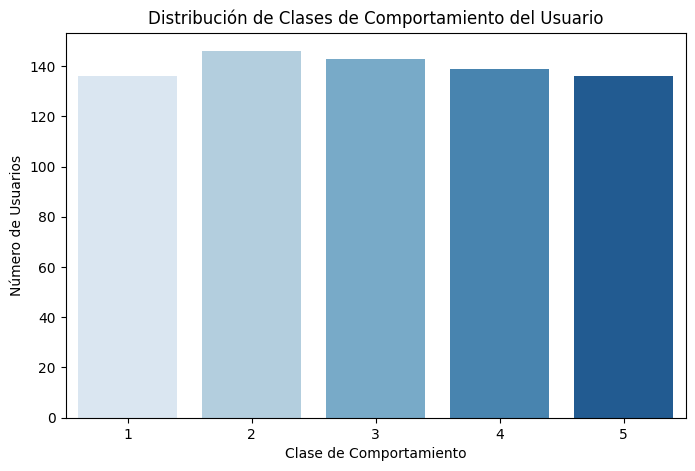

In [5]:
# Gráfico descriptivo sobre la representación que tiene cada 'clase de comportamiento' en el Dataset

paleta_clases = sns.color_palette("Blues", n_colors=5)

plt.figure(figsize=(8, 5))
sns.countplot(data=df_1, x='user_behavior_class', palette= paleta_clases)
plt.title('Distribución de Clases de Comportamiento del Usuario')
plt.xlabel('Clase de Comportamiento')
plt.ylabel('Número de Usuarios')
plt.show();


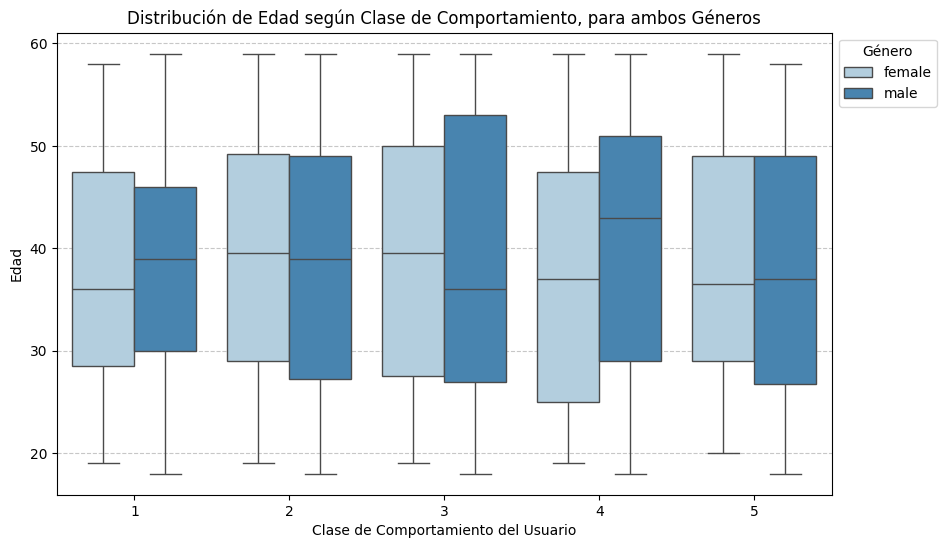

In [6]:
# Gráfico descriptivo sobre la distribución de Edad y Género según la 'Clase de comportamiento'
 
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_1,
    x='user_behavior_class',
    y='age',
    palette='Blues',
    hue='gender'
    )
plt.title('Distribución de Edad según Clase de Comportamiento, para ambos Géneros')
plt.xlabel('Clase de Comportamiento del Usuario')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylabel('Edad')
plt.legend(title= 'Género', loc=2, bbox_to_anchor=(1, 1))
plt.show();

C:\Users\xabi\AppData\Local\Temp\ipykernel_4848\3541389071.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(


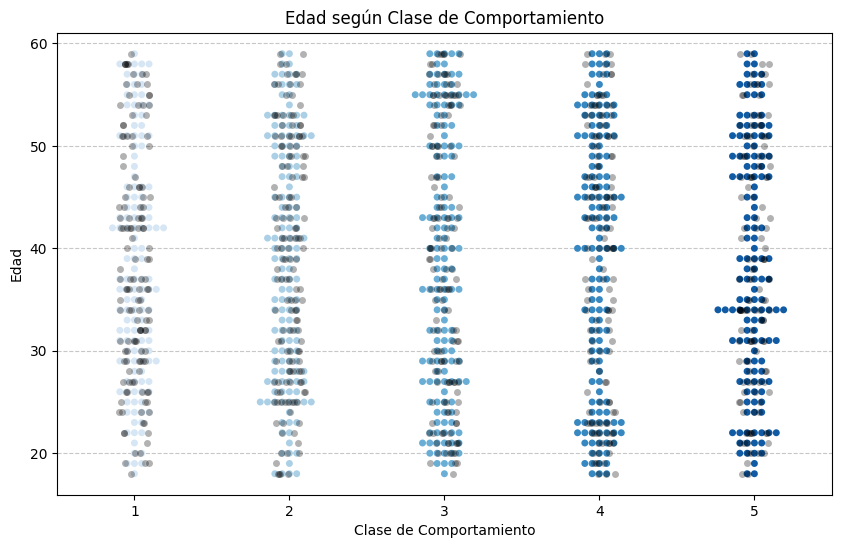

In [7]:
# Gráfico descriptivo sobre la distribución por puntos de la Edad según la 'Clase de comportamiento'

plt.figure(figsize=(10, 6))
sns.swarmplot(
    data=df_1,
    x='user_behavior_class',
    y='age',
    palette='Blues',
    size=5
    )

sns.stripplot(
    data=df_1,
    x='user_behavior_class',
    y='age',
    color='black',
    alpha=0.3,
    jitter=True
    )

plt.title('Edad según Clase de Comportamiento')
plt.xlabel('Clase de Comportamiento')
plt.ylabel('Edad')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



#### Observación general sobre el Dataset 1
Analizamos la variable `User Behavior Class`, que clasifica el comportamiento de los usuarios según su intensidad de uso de dispositivos móviles (donde 5 es un uso muy intensivo). Se observa que el dataset presenta una distribución sorprendentemente balanceada entre las cinco clases, con una frecuencia bastante similar en cada una de ellas. Este equilibrio es poco habitual en datos reales de comportamiento digital, donde lo normal sería encontrar una mayor concentración de usuarios en clases de uso bajo o medio, y menos usuarios en las clases de mayor intensidad.

Este patrón perfectamente equilibrado puede ser una señal de que los datos han sido generados sintéticamente o manipulados para cubrir un rango completo de perfiles de usuario, en lugar de reflejar una muestra natural del comportamiento real.

Aunque el uso de datos sintéticos no invalida su utilidad para ejercicios de aprendizaje y análisis exploratorio, es importante tenerlo en cuenta al interpretar los resultados y extraer conclusiones. Las relaciones descubiertas en el análisis deben considerarse como ejemplos potenciales de patrones, pero no necesariamente generalizables al comportamiento de usuarios reales.

<div style="background-color:#909090;color:black;">

### 4.2. Dataset 2 - Datos de un año de un Ecommerce
</div>

In [8]:
df_2 = pd.read_csv('data/cleaned_ecommerce.csv')
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51282 entries, 0 to 51281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_date           51282 non-null  object 
 1   time                 51282 non-null  object 
 2   aging                51282 non-null  float64
 3   customer_id          51282 non-null  int64  
 4   gender               51282 non-null  object 
 5   device_type          51282 non-null  object 
 6   customer_login_type  51282 non-null  object 
 7   product_category     51282 non-null  object 
 8   product              51282 non-null  object 
 9   sales                51282 non-null  float64
 10  quantity             51282 non-null  float64
 11  discount             51282 non-null  float64
 12  profit               51282 non-null  float64
 13  shipping_cost        51282 non-null  float64
 14  order_priority       51282 non-null  object 
 15  payment_method       51282 non-null 

C:\Users\xabi\AppData\Local\Temp\ipykernel_4848\1123681584.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


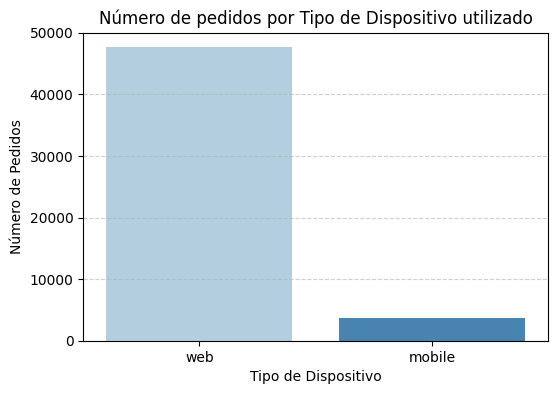

In [9]:
# Gráfico descriptivo sobre la distribución de pedidos por Tipo de Dispositivo utilizado 

plt.figure(figsize=(6, 4))

sns.countplot(
    data=df_2,
    x='device_type',
    palette='Blues')

plt.title('Número de pedidos por Tipo de Dispositivo utilizado')
plt.xlabel('Tipo de Dispositivo')
plt.ylabel('Número de Pedidos')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show();


C:\Users\xabi\AppData\Local\Temp\ipykernel_4848\3532864479.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


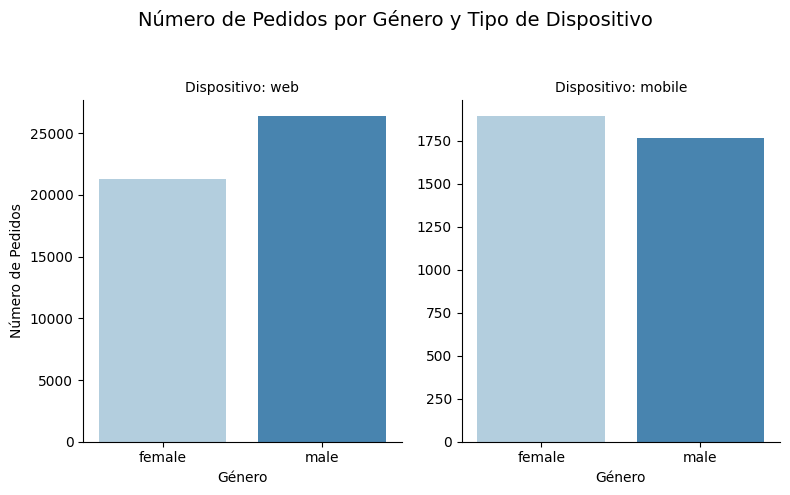

In [10]:
# Gráfico descriptivo con el Número de pedidos por Tipo de dispositivo y por Género.
g = sns.catplot(
    data=df_2,
    kind='count',
    x='gender',
    col='device_type',
    palette='Blues',
    height=5,
    aspect=0.8,
    sharey = False
)

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Número de Pedidos por Género y Tipo de Dispositivo', fontsize=14)
g.set_axis_labels("Género", "Número de Pedidos")
g.set_titles("Dispositivo: {col_name}")


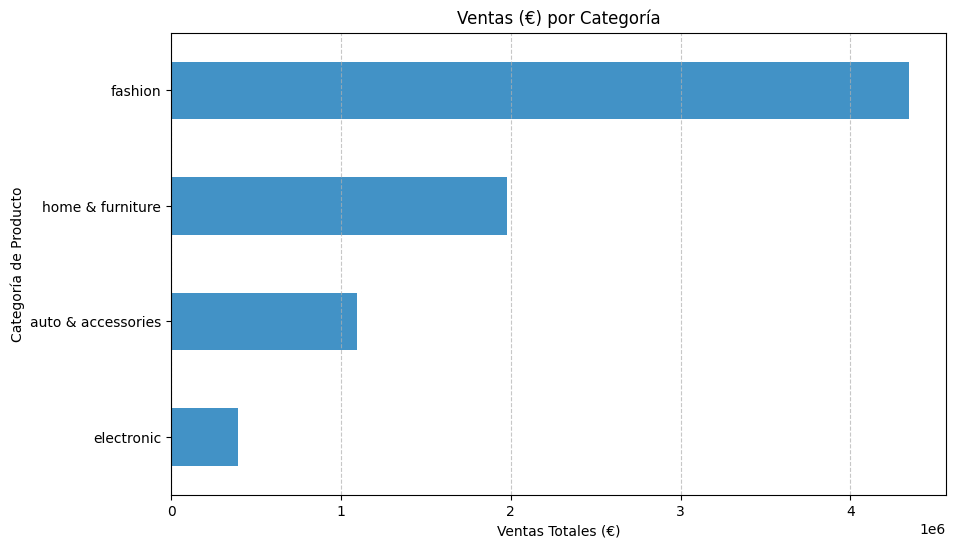

In [11]:
# Gráfico descriptivo de las Ventas (en Euros) por Categoría de Producto

categorias = df_2.groupby('product_category')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))

categorias.plot(
    kind='barh',
    color = AZUL_X
    )

plt.title('Ventas (€) por Categoría')
plt.xlabel('Ventas Totales (€)')
plt.ylabel('Categoría de Producto')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.show()


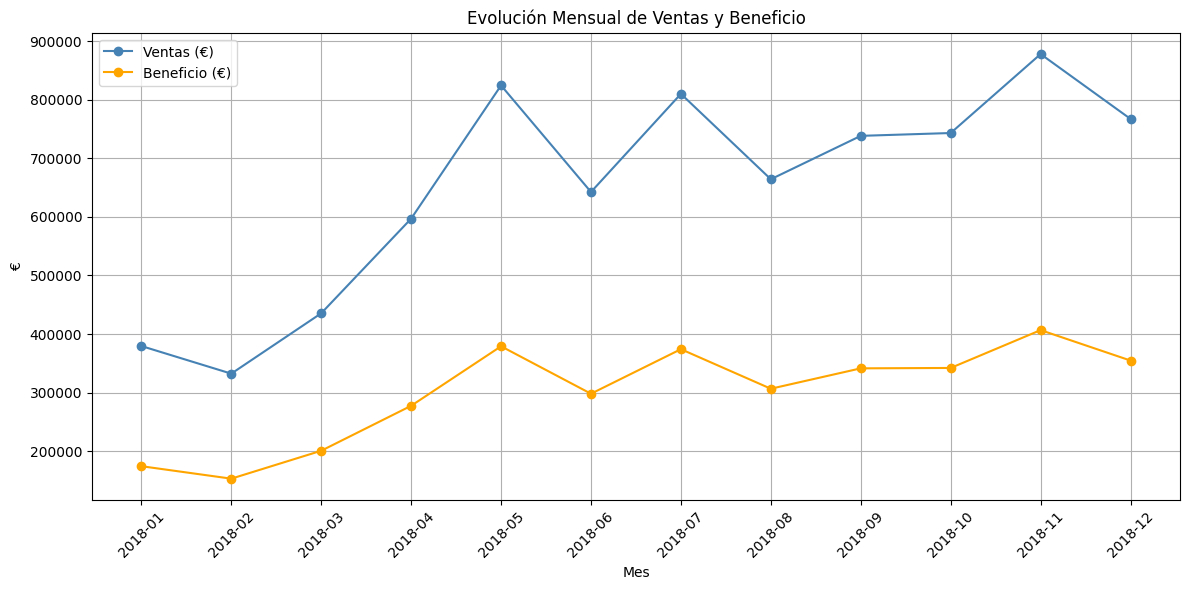

In [ ]:
# Gráfico descriptivo que relaciona las Ventas (€) con el Beneficio

# Convierto order_date en un 'pandas datetime object'.
df_2['order_date'] = pd.to_datetime(df_2['order_date'])

# Añado una columna 'month' con año/mes
df_2['month'] = df_2['order_date'].dt.to_period('M')

# Agrupamos por mes y sumar el beneficio
monthly_summary = df_2.groupby('month').agg(
    ventas=('sales', 'sum'),
    beneficio=('profit', 'sum')
).reset_index()


# Visualizar
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_summary['month'].astype(str),
    monthly_summary['ventas'],
    marker='o',
    label='Ventas (€)',
    color='steelblue')

plt.plot(
    monthly_summary['month'].astype(str),
    monthly_summary['beneficio'],
    marker='o',
    label='Beneficio (€)',
    color='orange')
plt.title('Evolución Mensual de Ventas y Beneficio')
plt.xlabel('Mes')
plt.ylabel('€')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



#### Observaciones generales sobre el Dataset 2

El Dataset 2 contiene información detallada sobre más de 51.000 pedidos realizados a lo largo del año 2018. Destaca una clara predominancia del canal web frente al móvil, tanto en volumen como en uso generalizado. Sin embargo, hay suficientes registros (+ 3.500) para extraer conclusiones respecto a los pedidos realizados con dispositivos móviles. Las ventas están distribuidas en múltiples categorías, siendo “fashion” y “home & furniture” las más relevantes en términos de facturación. El campo `order_date` abarca todo el año y permite análisis estacionales, mientras que variables como `device_type`, `gender`, `order_priority` y `product_category` facilitan la segmentación por perfil de compra. El dataset es adecuado para estudios exploratorios y para contrastar hipótesis de comportamiento, aunque al tratarse de datos anonimizados, debemos ir con cautela a la hora de sacar conclusiones en relación a las segmentaciones de los clientes.